In [1]:
# FYSS5304 Assignment 3-2 Panu Lappalainen
# Adapted from https://qiskit.org/textbook/ch-algorithms/grover.html

import matplotlib.pyplot as plt
import numpy as np

from qiskit import IBMQ, Aer, QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.providers.ibmq import least_busy
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram

In [2]:
n = 2
grover_circuit = QuantumCircuit(n)

In [3]:
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

In [4]:
grover_circuit = initialize_s(grover_circuit, [0,1])
grover_circuit.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     └───┘

In [5]:
# 2a:
grover_circuit.cz(0,1) # Oracle
grover_circuit.x([0,1]) # Flag 00
grover_circuit.draw()

┌───┐   ┌───┐
q_0: ┤ H ├─■─┤ X ├
     ├───┤ │ ├───┤
q_1: ┤ H ├─■─┤ X ├
     └───┘   └───┘

In [6]:
# Diffusion operator (U_s)
grover_circuit.h([0,1])
grover_circuit.z([0,1])
grover_circuit.cz(0,1)
grover_circuit.h([0,1])
grover_circuit.draw()

┌───┐   ┌───┐┌───┐┌───┐   ┌───┐
q_0: ┤ H ├─■─┤ X ├┤ H ├┤ Z ├─■─┤ H ├
     ├───┤ │ ├───┤├───┤├───┤ │ ├───┤
q_1: ┤ H ├─■─┤ X ├┤ H ├┤ Z ├─■─┤ H ├
     └───┘   └───┘└───┘└───┘   └───┘

In [7]:
sv_sim = Aer.get_backend('statevector_simulator')
job_sim = execute(grover_circuit, sv_sim)
statevec = job_sim.result().get_statevector()
from qiskit_textbook.tools import vector2latex
vector2latex(statevec, pretext="|\\psi\\rangle =")

<IPython.core.display.Math object>

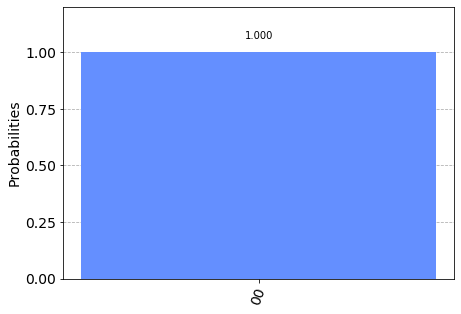

In [8]:
grover_circuit.measure_all()

qasm_simulator = Aer.get_backend('qasm_simulator')
shots = 1024
results = execute(grover_circuit, backend=qasm_simulator, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

In [10]:
# 2b: 
# All probabilities are the same due to overrotation